# Vacation Project

In [47]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import csv
import math
import statsmodels.api as sm
from scipy.optimize import minimize
%matplotlib inline

## Retrieval

##### Pull data

In [2]:
rent_main = pd.read_csv("E2_medianAskingRent_All.csv")
rent_main.head()

,Area,Boro,AreaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3050.0,3100.0,3100.0,3200.0,3195.0,...,3730.0,3700.0,3665.0,3675.0,3675.0,3644.0,3662.0,3760.0,3750.0,3795.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3500.0,3500.0,3500.0,3500.0,3355.5,3385.0,3400.0,3400.0,3400.0,3489.5
2,All Upper East Side,Manhattan,submarket,2459.5,2450.0,2400.0,2500.0,2550.0,2575.0,2595.0,...,2925.0,2900.0,2995.0,2950.0,2995.0,2990.0,2929.0,2900.0,2850.0,2845.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1810.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2395.0,2395.0,2354.0,2350.0,2275.0,2295.0,2290.0,2295.0,2316.0,2350.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,3385.0,3395.0,3395.0,3400.0,3350.0,3350.0,3350.0,3295.0,3250.0,3295.0


# Initial Look

##### How big is the data set?

In [3]:
print(rent_main.shape)

(202, 103)


##### Are there any duplicates?

In [4]:
print(len(rent_main['Area']))
print(len(set(rent_main['Area'])))
print(rent_main.duplicated().sum())
#No duplicates

202
202
0


##### Is there any missing data?

In [5]:
rent_main.isnull().sum().head()
#Yes lots depending on the date

Area          0
Boro          0
AreaType      0
2010-01     116
2010-02     121
dtype: int64

##### Any issues with data typing?

In [6]:
#No no big issues. We have strings for our area description
#And the values of all the asking rent prices are integers
#Problem with our NaN

##### Handle all issues and explain what you're doing.

In [7]:
#Biggest problem is that there are a bunch of missing values for rent
#Some dont't even have any values.
#What I will do is first assume that all missing rent values are the same as the most recent non-NaN rent.
#From there the "Areas" that are entirely NaN I will remove given that they add nothing to the data set.

In [8]:
temp1=rent_main.set_index(['AreaType'])
temp2=rent_main.set_index(['Boro'])
temp3=rent_main.set_index(['Area'])

missing_areatype=temp1.T.isnull().sum()
missing_boro=temp2.T.isnull().sum()
missing_area=temp3.T.isnull().sum()

# Wrangling

##### What is current index on DataFrame? Do you like it?

In [9]:
#The current index is numerical and no I do not like it. (No index)
#When I start working with data I will make a Hierarchical data fram with AreaType, Boro and Area as my indexes.

##### Would you create a different index and/ or orientation for this DataFrame? Why or why not?

In [10]:
#Yes I would create different orientation.
#I would reset the data to be indexed by subset of AreaType
#Within AreaType have subsets of Boros
#Within Boros have a subset of Area

##### If you have a different index in mind, go ahead and set it up

In [11]:
pvt=rent_main.set_index(['AreaType', 'Boro','Area'])
pvtt=rent_main.set_index(['AreaType', 'Boro','Area'])
pvt.head()

2010-01  2010-02  2010-03  2010-04  \
AreaType  Boro      Area                                                      
submarket Manhattan All Downtown          3200.0   3200.0   3050.0   3100.0   
                    All Midtown           2895.0   2800.0   2800.0   2850.0   
                    All Upper East Side   2459.5   2450.0   2400.0   2500.0   
                    All Upper Manhattan   1825.0   1810.0   1795.0   1800.0   
                    All Upper West Side   2895.0   2800.0   2750.0   2800.0   

                                         2010-05  2010-06  2010-07  2010-08  \
AreaType  Boro      Area                                                      
submarket Manhattan All Downtown          3100.0   3200.0   3195.0   3200.0   
                    All Midtown           2900.0   2950.0   3000.0   3000.0   
                    All Upper East Side   2550.0   2575.0   2595.0   2500.0   
                    All Upper Manhattan   1823.0   1850.0   1875.0   1850.0   
                    All Upper West Side   2800.0   2795.0   2800.0   2875.0   

                                         2010-09  2010-10   ...     2017-07  \
AreaType  Boro      Area                                    ...               
submarket Manhattan All Downtown          3400.0   3495.0   ...      3730.0   
                    All Midtown           3125.0   3150.0   ...      3500.0   
                    All Upper East Side   2595.0   2550.0   ...      2925.0   
                    All Upper Manhattan   1895.0   1877.5   ...      2395.0   
                    All Upper West Side   2995.0   3000.0   ...      3385.0   

                                         2017-08  2017-09  2017-10  2017-11  \
AreaType  Boro      Area                                                      
submarket Manhattan All Downtown          3700.0   3665.0   3675.0   3675.0   
                    All Midtown           3500.0   3500.0   3500.0   3355.5   
                    All Upper East Side   2900.0   2995.0   2950.0   2995.0   
                    All Upper Manhattan   2395.0   2354.0   2350.0   2275.0   
                    All Upper West Side   3395.0   3395.0   3400.0   3350.0   

                                         2017-12  2018-01  2018-02  2018-03  \
AreaType  Boro      Area                                                      
submarket Manhattan All Downtown          3644.0   3662.0   3760.0   3750.0   
                    All Midtown           3385.0   3400.0   3400.0   3400.0   
                    All Upper East Side   2990.0   2929.0   2900.0   2850.0   
                    All Upper Manhattan   2295.0   2290.0   2295.0   2316.0   
                    All Upper West Side   3350.0   3350.0   3295.0   3250.0   

                                         2018-04  
AreaType  Boro      Area                          
submarket Manhattan All Downtown          3795.0  
                    All Midtown           3489.5  
                    All Upper East Side   2845.0  
                    All Upper Manhattan   2350.0  
                    All Upper West Side   3295.0  

[5 rows x 100 columns]

# Analysis

### Fact-finding

##### Which Area saw the greates increase in median rent between the start and end times there? 

In [12]:
pvt=pvt.T.fillna(method='ffill').fillna(method='bfill').T.dropna()
pvt.head()

2010-01  2010-02  2010-03  2010-04  \
AreaType  Boro      Area                                                      
submarket Manhattan All Downtown          3200.0   3200.0   3050.0   3100.0   
                    All Midtown           2895.0   2800.0   2800.0   2850.0   
                    All Upper East Side   2459.5   2450.0   2400.0   2500.0   
                    All Upper Manhattan   1825.0   1810.0   1795.0   1800.0   
                    All Upper West Side   2895.0   2800.0   2750.0   2800.0   

                                         2010-05  2010-06  2010-07  2010-08  \
AreaType  Boro      Area                                                      
submarket Manhattan All Downtown          3100.0   3200.0   3195.0   3200.0   
                    All Midtown           2900.0   2950.0   3000.0   3000.0   
                    All Upper East Side   2550.0   2575.0   2595.0   2500.0   
                    All Upper Manhattan   1823.0   1850.0   1875.0   1850.0   
                    All Upper West Side   2800.0   2795.0   2800.0   2875.0   

                                         2010-09  2010-10   ...     2017-07  \
AreaType  Boro      Area                                    ...               
submarket Manhattan All Downtown          3400.0   3495.0   ...      3730.0   
                    All Midtown           3125.0   3150.0   ...      3500.0   
                    All Upper East Side   2595.0   2550.0   ...      2925.0   
                    All Upper Manhattan   1895.0   1877.5   ...      2395.0   
                    All Upper West Side   2995.0   3000.0   ...      3385.0   

                                         2017-08  2017-09  2017-10  2017-11  \
AreaType  Boro      Area                                                      
submarket Manhattan All Downtown          3700.0   3665.0   3675.0   3675.0   
                    All Midtown           3500.0   3500.0   3500.0   3355.5   
                    All Upper East Side   2900.0   2995.0   2950.0   2995.0   
                    All Upper Manhattan   2395.0   2354.0   2350.0   2275.0   
                    All Upper West Side   3395.0   3395.0   3400.0   3350.0   

                                         2017-12  2018-01  2018-02  2018-03  \
AreaType  Boro      Area                                                      
submarket Manhattan All Downtown          3644.0   3662.0   3760.0   3750.0   
                    All Midtown           3385.0   3400.0   3400.0   3400.0   
                    All Upper East Side   2990.0   2929.0   2900.0   2850.0   
                    All Upper Manhattan   2295.0   2290.0   2295.0   2316.0   
                    All Upper West Side   3350.0   3350.0   3295.0   3250.0   

                                         2018-04  
AreaType  Boro      Area                          
submarket Manhattan All Downtown          3795.0  
                    All Midtown           3489.5  
                    All Upper East Side   2845.0  
                    All Upper Manhattan   2350.0  
                    All Upper West Side   3295.0  

[5 rows x 100 columns]

In [13]:
(pvt['2018-04']-pvt['2010-01']).sort_values(ascending=False).head()
#Central Park South has greatest rent change in pure magnitude. Not by percentage.

AreaType      Boro       Area              
neighborhood  Manhattan  Central Park South    1500.0
              Brooklyn   Cobble Hill           1295.0
                         Downtown Brooklyn     1242.0
                         Gowanus               1160.0
                         East New York         1006.5
dtype: float64

In [14]:
((pvt['2018-04']-pvt['2010-01'])/pvt['2010-01']).sort_values(ascending=False).head()
#The greatest percentage increase is East New York at 91.5%

AreaType      Boro      Area         
neighborhood  Brooklyn  East New York    0.915000
                        Bath Beach       0.859535
              Bronx     Morrisania       0.736420
              Queens    Elmhurst         0.734783
              Brooklyn  Gowanus          0.725000
dtype: float64

##### Which Borough had the highest average median rent?

In [15]:
pvt.sort_index(level='AreaType').head()

2010-01  2010-02  2010-03  2010-04  \
AreaType Boro          Area                                                
borough  Bronx         Bronx           1600.0   1600.0   1508.0   1500.0   
         Brooklyn      Brooklyn        2200.0   2150.0   2150.0   2150.0   
         Manhattan     Manhattan       2800.0   2795.0   2743.5   2800.0   
         Queens        Queens          1655.0   1675.0   1700.0   1675.0   
         Staten Island Staten Island   1425.0   1425.0   1425.0   1425.0   

                                      2010-05  2010-06  2010-07  2010-08  \
AreaType Boro          Area                                                
borough  Bronx         Bronx           1600.0   1508.0   1529.0   1600.0   
         Brooklyn      Brooklyn        2200.0   2250.0   2300.0   2300.0   
         Manhattan     Manhattan       2800.0   2850.0   2875.0   2890.0   
         Queens        Queens          1550.0   1550.0   1550.0   1550.0   
         Staten Island Staten Island   1425.0   1425.0   1425.0   1425.0   

                                      2010-09  2010-10   ...     2017-07  \
AreaType Boro          Area                              ...               
borough  Bronx         Bronx           1600.0   1500.0   ...      1750.0   
         Brooklyn      Brooklyn        2400.0   2390.0   ...      2595.0   
         Manhattan     Manhattan       2999.0   3000.0   ...      3300.0   
         Queens        Queens          1575.0   1600.0   ...      2250.0   
         Staten Island Staten Island   1425.0   1425.0   ...      1950.0   

                                      2017-08  2017-09  2017-10  2017-11  \
AreaType Boro          Area                                                
borough  Bronx         Bronx           1750.0   1750.0   1790.0   1755.0   
         Brooklyn      Brooklyn        2620.0   2595.0   2500.0   2495.0   
         Manhattan     Manhattan       3300.0   3300.0   3295.0   3200.0   
         Queens        Queens          2300.0   2250.0   2200.0   2200.0   
         Staten Island Staten Island   2000.0   1790.0   1875.0   1887.5   

                                      2017-12  2018-01  2018-02  2018-03  \
AreaType Boro          Area                                                
borough  Bronx         Bronx           1726.5   1787.0   1800.0   1850.0   
         Brooklyn      Brooklyn        2450.0   2450.0   2450.0   2495.0   
         Manhattan     Manhattan       3208.0   3225.0   3225.5   3204.0   
         Queens        Queens          2195.0   2150.0   2150.0   2200.0   
         Staten Island Staten Island   1925.0   1850.0   1882.0   1828.5   

                                      2018-04  
AreaType Boro          Area                    
borough  Bronx         Bronx           1900.0  
         Brooklyn      Brooklyn        2500.0  
         Manhattan     Manhattan       3265.0  
         Queens        Queens          2200.0  
         Staten Island Staten Island   1832.0  

[5 rows x 100 columns]

In [16]:
borough_data=pvt.loc['borough'].median(axis=1)
borough_data
#highest median rent of the 5 boroughs is Manhattan at $3,216

Boro           Area         
Bronx          Bronx            1550.0
Brooklyn       Brooklyn         2500.0
Manhattan      Manhattan        3216.5
Queens         Queens           2185.0
Staten Island  Staten Island    1650.0
dtype: float64

##### If you were to put together an "index" to describe each Borough through summarizing the median prices for each of its Areas, would you use a mean or median, and why?

In [17]:
#I would use median because the mean more heavily weights the outliers.

# Exploration

##### Plot a histogram of the median rents across all Areas for 2018-04

Text(0,0.5,'Rent Bins')

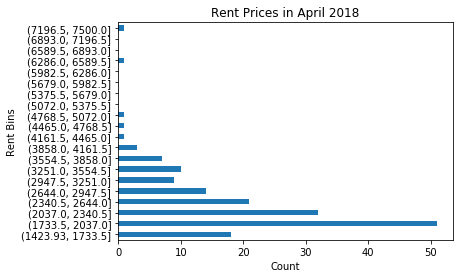

In [18]:
zzz=pd.cut(pvt['2018-04'].values,bins=20).value_counts().plot(kind='barh')
plt.title('Rent Prices in April 2018')
plt.xlabel('Count')
plt.ylabel('Rent Bins')

Text(0,0.5,'Density')

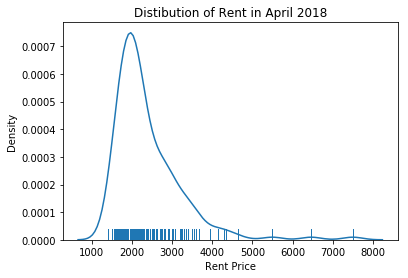

In [19]:
import seaborn as sns
returns=pvt.pct_change()
returns=returns.drop(returns.index[[0]])
sns.distplot(pvt['2018-01'], hist=False, rug=True)
plt.title('Distibution of Rent in April 2018')
plt.xlabel('Rent Price')
plt.ylabel('Density')

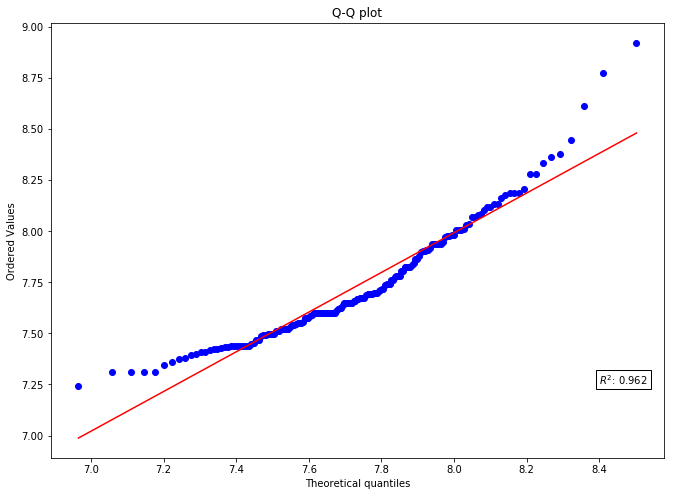

In [20]:
import matplotlib.pyplot as plt
import scipy.stats as sp


def qq_plot(series, figsize=(11, 8)):
    """compare given series to Normal distirbution
    with matching location & scale"""
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    arrs, res = sp.probplot(series, 
                            dist=sp.norm, 
                            sparams=(series.mean(), series.std()), 
                            plot=ax)
    bbox = {'fc': '1', 'pad': 3}
    xy = (ax.get_xticks()[-2], ax.get_yticks()[2])
    text = ax.annotate(r'$R^2$: {}'.format(round(res[2], 3)),
                     xy=xy,
                     bbox=bbox)
    title = ax.set_title('Q-Q plot')
qq_plot(np.log(pvt['2018-01']), figsize=(11,8))

##### Pick 3-5 Areas, for which there is data for the entire provided time period, and form a new table out of these

In [21]:
pvtt.T.isnull().sum().head()
# Areas are All Downtown, All Midtown, All Upper East Side, All Upper Manhattan, All Upper West Side

AreaType   Boro       Area               
submarket  Manhattan  All Downtown           0
                      All Midtown            0
                      All Upper East Side    0
                      All Upper Manhattan    0
                      All Upper West Side    0
dtype: int64

In [22]:
date=pd.to_datetime(pvt.T.index)
new_dataFrame = pd.DataFrame({'All Downtown':pvt.loc['submarket','Manhattan', 'All Downtown'],
                              'All Midtown':pvt.loc['submarket','Manhattan', 'All Midtown'],
                              'All Upper East Side':pvt.loc['submarket','Manhattan', 'All Upper East Side'],
                              'All Upper Manhattan':pvt.loc['submarket','Manhattan', 'All Upper Manhattan'],
                              'All Upper West Side':pvt.loc['submarket','Manhattan', 'All Upper West Side'],
                              'Date':date})
date=pd.to_datetime(new_dataFrame.index)
new_dataFrame.set_index('Date', inplace=True)
new_dataFrame.head()

,All Downtown,All Midtown,All Upper East Side,All Upper Manhattan,All Upper West Side
Date,,,,,
2010-01-01,3200.0,2895.0,2459.5,1825.0,2895.0
2010-02-01,3200.0,2800.0,2450.0,1810.0,2800.0
2010-03-01,3050.0,2800.0,2400.0,1795.0,2750.0
2010-04-01,3100.0,2850.0,2500.0,1800.0,2800.0
2010-05-01,3100.0,2900.0,2550.0,1823.0,2800.0


##### Make a time-series plot of the median rents for these Areas

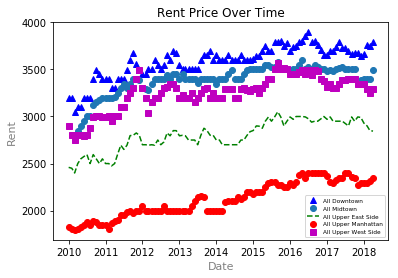

In [23]:
plt.plot(new_dataFrame['All Downtown'], '^b')
plt.plot(new_dataFrame['All Midtown'], 'o')
plt.plot(new_dataFrame['All Upper East Side'], 'g--')
plt.plot(new_dataFrame['All Upper Manhattan'], 'ro')
plt.plot(new_dataFrame['All Upper West Side'], 'ms')
plt.xlabel('Date', fontsize=11, color='grey')
plt.ylabel('Rent', fontsize=11, color='grey')
plt.title('Rent Price Over Time')
plt.legend(loc='best', frameon=True, fontsize='xx-small')

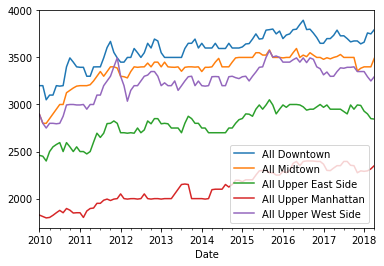

In [24]:
new_dataFrame.resample('M').last().plot()

##### Produce a table summary statistics for your selected Areas

In [25]:
Table_summary=new_dataFrame.describe()
Table_summary

,All Downtown,All Midtown,All Upper East Side,All Upper Manhattan,All Upper West Side
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3584.490000,3377.695000,2794.565000,2117.990000,3248.085000
std,178.105887,173.903388,163.347366,186.468591,188.589074
min,3050.000000,2800.000000,2400.000000,1795.000000,2750.000000
25%,3500.000000,3350.000000,2700.000000,1995.000000,3200.000000
50%,3608.250000,3400.000000,2800.000000,2100.000000,3295.000000
75%,3700.000000,3500.000000,2950.000000,2295.000000,3381.250000
max,3895.000000,3595.000000,3050.000000,2400.000000,3572.500000


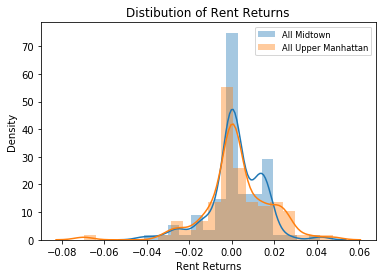

In [26]:
returns=new_dataFrame.pct_change()
returns=returns.drop(returns.index[[0]])
#sns.distplot(returns['All Downtown'], label='All Downtown')
sns.distplot(returns['All Midtown'], label='All Midtown')
#sns.distplot(returns['All Upper East Side'], label='All Upper East Side')
sns.distplot(returns['All Upper Manhattan'], label='All Upper Manhattan')
#sns.distplot(returns['All Upper West Side'], label='All Upper West Side')
plt.title('Distibution of Rent Returns')
plt.xlabel('Rent Returns')
plt.ylabel('Density')
plt.legend(loc='best', frameon=True, fontsize='small')

# Serialization

##### Write your summary statistics table to an Excel spreadsheet

In [27]:
writer=pd.ExcelWriter('Output.xlsx', engine='xlsxwriter')
Table_summary.to_excel(writer, sheet_name='Summary Statistics')

##### Write the full table for your selected Areas to another sheet in the same spreadsheet

In [28]:
new_dataFrame.to_excel(writer, sheet_name='Full Rent Data')
writer.save()

##### Name the sheets appropriately

In [29]:
#Thumbs Up!

##### Are there any other data formates that could be useful to write data to? Why?

In [30]:
#Yes it can be useful to write data out to other data formats. 
#While I am unfamiliar with a lot of the data formats offered such as feathered and dense. 
#Other options often saves memory and creates additional ease of access. 
#For example Pickling the data is absolutely necessary for parallel computing. 
#Other data types just make it much easier to access, 
#for example writing it out to a sql or stata file make it much easier for those languages to access and work with.

# Modeling
      Rent Prediction

##### What type of model would you use to predict, for one of your selected Areas, its median rent for 2018-05? Why?

In [31]:
#My initial thought is to use an OLS linear regression model.
#Given I am limmited on data and when looking at the graph above the rent rate growth is realitivley linear over time

##### What kind of pre-treatment might you preform to help set the stage for modeling? Why, or why might you not do anything?

In [32]:
#Pre Treatment
    ### Missing Data: Given that the Areas I am using have no missing data nothing needs to be done about this.
    ### Noninformative: I feel each month is valuble especially in training the data. The predictive value of the first months is useless but I will adjust for this when applying the model by limmiting the window in which the model can view.
    ### Outliers: This could be useful given there are some dramatic jumps but I still think it is neccessary to keep them because I think it is more important to retain monthly data as oppossed to having gaps.
        #I think it would bias the model to a much more constant based model
        #Additionally I think with 100 months of data the outlier's effect will be mitigated.

##### Go ahead and develop a model to predict that next median rent value. How are you training the model, and how are you evaluating its performance?

### AR model 

In [33]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = new_dataFrame['All Downtown'].values
train, test = X[1:len(X)-25], X[len(X)-25:]

In [34]:
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag Variables: %s' % model_fit.k_ar)

Lag Variables: 11


In [35]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f, error=%f' % (yhat, obs, yhat-obs))
error = math.sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)

predicted=3779.487047, expected=3795.000000, error=-15.512953
predicted=3765.176081, expected=3800.000000, error=-34.823919
predicted=3785.645317, expected=3850.000000, error=-64.354683
predicted=3823.333168, expected=3895.000000, error=-71.666832
predicted=3872.909706, expected=3796.000000, error=76.909706
predicted=3774.462906, expected=3800.000000, error=-25.537094
predicted=3791.831998, expected=3758.500000, error=33.331998
predicted=3763.688201, expected=3711.000000, error=52.688201
predicted=3706.688219, expected=3650.000000, error=56.688219
predicted=3687.743090, expected=3650.000000, error=37.743090
predicted=3690.936974, expected=3700.000000, error=-9.063026
predicted=3742.121034, expected=3700.000000, error=42.121034
predicted=3722.042249, expected=3735.000000, error=-12.957751
predicted=3782.112146, expected=3790.000000, error=-7.887854
predicted=3820.115936, expected=3729.000000, error=91.115936
predicted=3738.570734, expected=3730.000000, error=8.570734
predicted=3745.9728

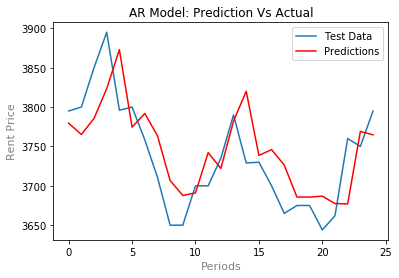

In [36]:
# plot
plt.plot(test, label='Test Data')
plt.plot(predictions, color='red', label='Predictions')
plt.xlabel('Periods', fontsize=11, color='grey')
plt.ylabel('Rent Price', fontsize=11, color='grey')
plt.title('AR Model: Prediction Vs Actual')
plt.legend()
#On average I am about $45 off

### My model (12 month, 6 month, 3 month, pct_change)

In [37]:
#Create new working data
y=new_dataFrame['All Downtown']
per=new_dataFrame['All Downtown'].pct_change()
m3=new_dataFrame['All Downtown'].rolling(3).mean()
m6=new_dataFrame['All Downtown'].rolling(6).mean()
m12=new_dataFrame['All Downtown'].rolling(12).mean()

w_data = pd.DataFrame({'MVA 12':m12,'MVA 6': m6,'MVA3':m3, 'Percent Change':per, 'Y':y})
ydata=w_data['Y'][12:].values
xdata=w_data[['MVA 12', 'MVA 6', 'MVA3', 'Percent Change']][11:len(w_data)-1].values
xdata=np.matrix(xdata.reshape(len(xdata),4))

In [38]:
from scipy.optimize import curve_fit
training_size=63
def func(x, a, b1, b2, b3, b4):
    return a + x[0:,0]*b1 + x[0:,1]*b2 + x[0:,2]*b3+ x[0:,3]*b4
popt=curve_fit(func, xdata[:training_size], ydata[:training_size])
popt=popt[0]
new_predictions=func(xdata[training_size:],*popt)
actual_data=ydata[training_size:]

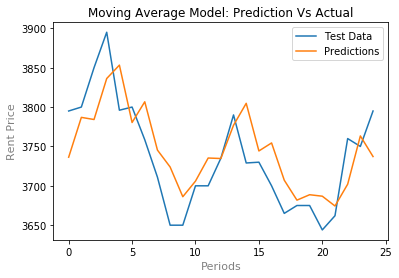

In [39]:
#Lets test it
#Training size is the limmit of my test data
plt.plot(ydata[training_size:], label= 'Test Data')
plt.plot(func(xdata[training_size:], *popt), label= 'Predictions')
plt.xlabel('Periods', fontsize=11, color='grey')
plt.ylabel('Rent Price', fontsize=11, color='grey')
plt.title('Moving Average Model: Prediction Vs Actual')
plt.legend()

In [40]:
math.sqrt(mean_squared_error(new_predictions, actual_data))

43.15961014982061

##### Predict values for 2018-05. Now that you have that value, predict values for the following June and July as well.

In [41]:
#AR Prediction
Xx = new_dataFrame['All Downtown'].values
Xx= [Xx[i] for i in range(len(Xx))]
month=[]
for t in range(10):
    length=len(Xx)
    lag = [Xx[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    Xx.append(yhat)
    month.append(yhat)
    print('predicted=%f' % (yhat))
print('May=%f, June=%f, July=%f' % (month[0], month[1], month[2]))
#On average I am about $45 off

predicted=3782.769678
predicted=3779.338886
predicted=3749.836177
predicted=3730.149585
predicted=3721.606567
predicted=3731.406537
predicted=3710.916315
predicted=3713.736913
predicted=3730.177562
predicted=3743.582983
May=3782.769678, June=3779.338886, July=3749.836177


##### Visualize your predicted data. How does it look?

In [42]:
#It looks reasonable, however the biggest issues is that spike changes in price heavily effect the data.
#I thought about retraining my data each additional month but I felt that the predictive value of that drops of dramtically after the first new value is added.
#Another thing to consider is that for the AR model it decided to do a 12 month lag which I think is interesting being that would be 1 full year.

### AR Model (log returns)

In [43]:
lx = np.log(new_dataFrame['All Downtown']).diff().values
train, test = lx[1:len(lx)-25], lx[len(lx)-25:]

In [44]:
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag Variables: %s' % model_fit.k_ar)

Lag Variables: 11


In [45]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f, error=%f' % (yhat, obs, yhat-obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=0.014127, expected=0.011929, error=0.002199
predicted=-0.002076, expected=0.001317, error=-0.003392
predicted=0.003028, expected=0.013072, error=-0.010044
predicted=0.000882, expected=0.011621, error=-0.010738
predicted=0.002141, expected=-0.025746, error=0.027887
predicted=0.000030, expected=0.001053, error=-0.001023
predicted=0.004805, expected=-0.010981, error=0.015786
predicted=0.008394, expected=-0.012719, error=0.021112
predicted=0.003923, expected=-0.016574, error=0.020497
predicted=0.014960, expected=0.000000, error=0.014960
predicted=0.015401, expected=0.013606, error=0.001796
predicted=0.015412, expected=0.000000, error=0.015412
predicted=0.008487, expected=0.009415, error=-0.000928
predicted=0.015611, expected=0.014618, error=0.000993
predicted=0.011494, expected=-0.016226, error=0.027720
predicted=0.003951, expected=0.000268, error=0.003683
predicted=0.007161, expected=-0.008075, error=0.015237
predicted=0.010072, expected=-0.009504, error=0.019576
predicted=0.008

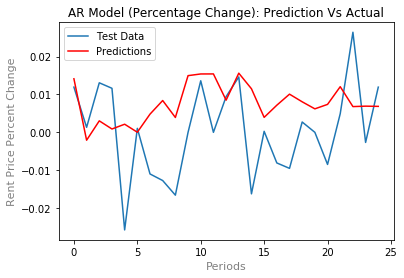

In [46]:
plt.plot(test, label='Test Data')
plt.plot(predictions, color='red', label='Predictions')
plt.xlabel('Periods', fontsize=11, color='grey')
plt.ylabel('Rent Price Percent Change', fontsize=11, color='grey')
plt.title('AR Model (Percentage Change): Prediction Vs Actual')
plt.legend()